In [1]:
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import candidate
import uproot
from coffea.nanoevents import NanoEventsFactory, BaseSchema
import json
import hist
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-fz23gdd6 because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
class MyProcessor(processor.ProcessorABC):
    def __init__(self):
        pass

    def process(self, events):
        # print(events.jetadR)
        # dataset_axis = hist.axis.StrCategory([], growth=True, name="dataset", label="Primary dataset")
        # dR_axis = hist.axis.Regular(10, 0, 0.5, name="dR", label="Jet A dR")
        dataset = events.metadata['dataset']
        # print("jetE--------------------",events.jetE)
        jet = ak.zip(
            {
                "jetM": ak.flatten(events.jetM),
                "jetPt": ak.flatten(events.jetPt),
                # "jetE": ak.flatten(events.jetE),
                "jetadR":ak.flatten(events.jetadR),
                "TaudR":ak.flatten(events.TaudR),
                "Tau1dR":ak.flatten(events.Tau1dR),
                "Tau2dR":ak.flatten(events.Tau2dR),
                "a_m": ak.flatten(events.a_m),
                "a_pt": ak.flatten(events.a_pt),
                "a_eta":ak.flatten(events.a_eta),
                "a_phi":ak.flatten(events.a_phi),
                "Tau1pT":ak.flatten(events.Tau1pT),
                "Tau2pT":ak.flatten(events.Tau2pT),
                "NrecoTaus": ak.flatten(events.NrecoTaus),
                "NGenTaus": ak.flatten(events.NGenTaus),
                "recoTau1dR": ak.flatten(events.recoTau1dR),
                "recoTau2dR": ak.flatten(events.recoTau2dR),
                "n1dR": ak.flatten(events.n1dR),
                "n2dR": ak.flatten(events.n2dR),
                
               
            },
            with_name="PtEtaPhiMCandidate",
            behavior=candidate.behavior,
         
        )
        
        jetmass = jet.jetM[jet.jetM > -22.22]
        amass = jet.a_m[jet.a_m > -22.22]
        jetpt = jet.jetPt[jet.jetPt>-22.22]
        apt = jet.a_pt[jet.a_pt>-22.22]
        aeta = jet.a_eta[jet.a_eta>-22.22]
        aphi = jet.a_phi[jet.a_phi>-22.22]
        tau1pt = jet.Tau1pT[jet.Tau1pT>-22.22]
        tau2pt = jet.Tau2pT[jet.Tau2pT>-22.22]
        recotau1dr = jet.recoTau1dR[jet.recoTau1dR>-22.22]
        recotau2dr = jet.recoTau2dR[jet.recoTau2dR>-22.22]
        n1dr = jet.n1dR[jet.n1dR>-22.22]
        n2dr = jet.n2dR[jet.n2dR>-22.22]
        tau1dr = jet.Tau1dR[jet.Tau1dR>-22.22]
        tau2dr = jet.Tau2dR[jet.Tau2dR>-22.22]
        taudr = jet.TaudR[jet.TaudR>-22.22]
        adr = jet.jetadR[jet.jetadR>-22.22]
        gentau = jet.NGenTaus[jet.NGenTaus > -22.22]
        recotau = jet.NrecoTaus[jet.NrecoTaus > -22.22]
        
        # Jet mass -----------------------------------------------------------

        jet_mass = (
            hist.Hist.new
            .StrCat(["jet mass"], name="hmassjet")
            .Reg(65, 1, 26.6, name="massjet", label="Mass [GeV]")
            .Int64()
        )
        jet_mass.fill(hmassjet="jet mass", massjet=jetmass)
        
        # A mass  -----------------------------------------------------------
        
        A_mass = (
            hist.Hist.new
            .StrCat(["A mass"], name="hmassa")
            .Reg(36, 3.2, 17.2, name="massa", label="Mass [GeV]")
            .Int64()
        )
        A_mass.fill(hmassa="A mass", massa=amass)

        # JET PT -----------------------------------------------------------
        
        jet_pt = (
            hist.Hist.new
            .StrCat(["jet_pt"], name="hjetpt")
            .Reg(19, 10, 200, name="pt_jet", label="pT [GeV]")
            .Int64()
        )
        
        jet_pt.fill(hjetpt="jet_pt", pt_jet=jetpt)

        # A pt  -----------------------------------------------------------
        
        A_pt = (
            hist.Hist.new
            .StrCat([ "A_pt"], name="hapt")
            .Reg(19, 10, 200, name="pt_a", label="pT [GeV]")
            .Int64()
        )
        
        A_pt.fill(hapt="A_pt", pt_a=apt)
        
        # gen Tau1 pt -----------------------------------------------------------
        
        Tau1_pt = (
            hist.Hist.new
            .StrCat([ "Tau1_pt"], name="htau1pt")
            .Reg(19, 10, 200, name="pt_tau1", label="pT [GeV]")
            .Int64()
        )
        
        Tau1_pt.fill(htau1pt="Tau1_pt", pt_tau1=tau1pt)
        
        # gen Tau1 pt -----------------------------------------------------------
        
        Tau2_pt = (
            hist.Hist.new
            .StrCat([ "Tau2_pt"], name="htau2pt")
            .Reg(19, 10, 200, name="pt_tau2", label="pT [GeV]")
            .Int64()
        )
        
        Tau2_pt.fill(htau2pt="Tau2_pt", pt_tau2=tau2pt)
        
        # A eta -----------------------------------------------------------
        
        A_eta = (
            hist.Hist.new
            .StrCat([ "A_ata"], name="haeta")
            .Reg(10, -5, 5, name="eta_a", label="eta")
            .Int64()
        )
        
        A_eta.fill(haeta="A_eta", eta_a=aeta)
       
        # A phi -----------------------------------------------------------
        A_phi = (
            hist.Hist.new
            .StrCat([ "A_phi"], name="haphi")
            .Reg(10, -3.2, 3.2, name="phi_a", label="phi")
            .Int64()
        )
        
        A_phi.fill(haphi="A_phi", phi_a=aphi)
        
        # a nad jet dR -----------------------------------------------------------
        
        
        a_jet_dR = (
            hist.Hist.new
            .StrCat(["a_jet_dR"], name="hajetdR")
            .Reg(10, 0.0, 0.5, name="ajetdr", label="dR")
            .Int64()
        )
        a_jet_dR.fill(hajetdR="a_jet_dR", ajetdr=adr)
        
        # gen tau1 jet dR -----------------------------------------------------------
        
        tau1_jet_dR = (
            hist.Hist.new
            .StrCat(["tau1_dr"], name="htau1jetdR")
            .Reg(10, 0.0, 0.5, name="tau1jetdr", label="dR")
            .Int64()
        )
        tau1_jet_dR.fill(htau1jetdR="tau1_dr", tau1jetdr=tau1dr)
        
        # gen tau2 jet dR -----------------------------------------------------------
        
        tau2_jet_dR = (
            hist.Hist.new
            .StrCat(["tau2_dr"], name="htau2jetdR")
            .Reg(10, 0.0, 0.5, name="tau2jetdr", label="dR")
            .Int64()
        )
        tau2_jet_dR.fill(htau2jetdR="tau2_dr", tau2jetdr=tau2dr)
        
                
        # reco tau1 jet dR -----------------------------------------------------------
        
        recotau1_jet_dR = (
            hist.Hist.new
            .StrCat(["recotau1_dr"], name="hrecotau1jetdR")
            .Reg(10, 0.0, 0.5, name="recotau1jetdr", label="dR")
            .Int64()
        )
        recotau1_jet_dR.fill(hrecotau1jetdR="recotau1_dr", recotau1jetdr=recotau1dr)
        
       # reco tau2 jet dR -----------------------------------------------------------
        
        recotau2_jet_dR = (
            hist.Hist.new
            .StrCat(["recotau2_dr"], name="hrecotau2jetdR")
            .Reg(10, 0.0, 0.5, name="recotau2jetdr", label="dR")
            .Int64()
        )
        recotau2_jet_dR.fill(hrecotau2jetdR="recotau2_dr", recotau2jetdr=recotau2dr)
        
        #gen tau1 tau2 dR -----------------------------------------------------------
        
        taus_dR = (
            hist.Hist.new
            .StrCat(["taus_dr"], name="htausdR")
            .Reg(10, 0.0, 0.5, name="tau_tau_dr", label="dR")
            .Int64()
        )
        taus_dR.fill(htausdR="taus_dr", tau_tau_dr=taudr)
        
        
        
        
        
        # number of gen taus -----------------------------------------------------------
        
        gen_Tau = (
                    hist.Hist.new
                    .StrCat(["gen_tau"], name="hgentau")
                    .Reg(5, 0, 5., name="gtau", label="Number of Tau")
                    .Int64()
                )
        gen_Tau.fill(hgentau="gen_tau", gtau=gentau)
            
            
        # number of reco taus -----------------------------------------------------------
        
        reco_Tau = (
                    hist.Hist.new
                    .StrCat(["reco_tau"], name="hrecotau")
                    .Reg(5, 0, 5., name="rtau", label="Number of Tau")
                    .Int64()
                )
        reco_Tau.fill(hrecotau="reco_tau", rtau=recotau)
        
        #----------------------------------------------------------------------------------
        
       
        
        
        
        return {
            dataset: {
                "entries": len(events),
                "jet_mass":jet_mass,
                "a_mass":A_mass,
                "jet_pt":jet_pt,
                "a_pt":A_pt,
                "tau1_pt":Tau1_pt,
                "tau2_pt":Tau2_pt,
                "a_eta":A_eta,
                "a_phi":A_phi,
                "tau1_jet_dr":tau1_jet_dR,
                "tau2_jet_dr":tau2_jet_dR,
                "taus_dr":taus_dR,
                "a_jet_dr":a_jet_dR,
                "recotau1_jet_dr":recotau1_jet_dR,
                "recotau2_jet_dr":recotau2_jet_dR,
                "number_gen_tau":gen_Tau,
                "number_reco_tau":reco_Tau,
                # "amass":amass,
               
            }
        }

    def postprocess(self, accumulator):
        pass

In [3]:
with open("massregression_sample_dataset_0000.json", "r") as fin1:
    file_list_massreg_sample_000 = json.load(fin1)
with open("signal_sample_M14.json", "r") as fin2:
    files_signal_sample_M14 = json.load(fin2)  
with open("signal_sample_M12.json", "r") as fin3:
    files_signal_sample_M12 = json.load(fin3)    
with open("signal_sample_M10.json", "r") as fin4:
    files_signal_sample_M10 = json.load(fin4)    
with open("signal_sample_M8.json", "r") as fin5:
    files_signal_sample_M8 = json.load(fin5) 
with open("signal_sample_M6.json", "r") as fin6:
    files_signal_sample_M6 = json.load(fin6) 
with open("signal_sample_M5.json", "r") as fin7:
    files_signal_sample_M5 = json.load(fin7)
with open("signal_sample_M4.json", "r") as fin8:
    files_signal_sample_M4 = json.load(fin8)
with open("signal_sample_M3p7.json", "r") as fin9:
    files_signal_sample_M3p7 = json.load(fin9)
    
             
fileset = {
    'train_mass': file_list_massreg_sample_000,
    'signal_m14': files_signal_sample_M14,
    'signal_m12': files_signal_sample_M12,
    'signal_m10': files_signal_sample_M10,
    'signal_m8': files_signal_sample_M8,
    'signal_m6': files_signal_sample_M6,
    'signal_m5': files_signal_sample_M5,
    'signal_m4': files_signal_sample_M4,
    'signal_m3p7': files_signal_sample_M3p7,
                  
}


In [4]:
futures_run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=16),
    schema=BaseSchema,
    # maxchunks=1,
)

out = futures_run(
    fileset,
    treename='/fevt/RHTree',
    # "RHTree",
    processor_instance=MyProcessor()
)
out

Output()

Output()

{'signal_m3p7': {'entries': 891563,
  'jet_mass': Hist(
    StrCategory(['jet mass'], name='hmassjet'),
    Regular(65, 1, 26.6, name='massjet', label='Mass [GeV]'),
    storage=Int64()) # Sum: 1416132.0 (1416893.0 with flow),
  'a_mass': Hist(
    StrCategory(['A mass'], name='hmassa'),
    Regular(36, 3.2, 17.2, name='massa', label='Mass [GeV]'),
    storage=Int64()) # Sum: 1416893.0,
  'jet_pt': Hist(
    StrCategory(['jet_pt'], name='hjetpt'),
    Regular(19, 10, 200, name='pt_jet', label='pT [GeV]'),
    storage=Int64()) # Sum: 1416708.0 (1416893.0 with flow),
  'a_pt': Hist(
    StrCategory(['A_pt'], name='hapt'),
    Regular(19, 10, 200, name='pt_a', label='pT [GeV]'),
    storage=Int64()) # Sum: 1416893.0,
  'tau1_pt': Hist(
    StrCategory(['Tau1_pt'], name='htau1pt'),
    Regular(19, 10, 200, name='pt_tau1', label='pT [GeV]'),
    storage=Int64()) # Sum: 1416893.0,
  'tau2_pt': Hist(
    StrCategory(['Tau2_pt'], name='htau2pt'),
    Regular(19, 10, 200, name='pt_tau2', label=

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

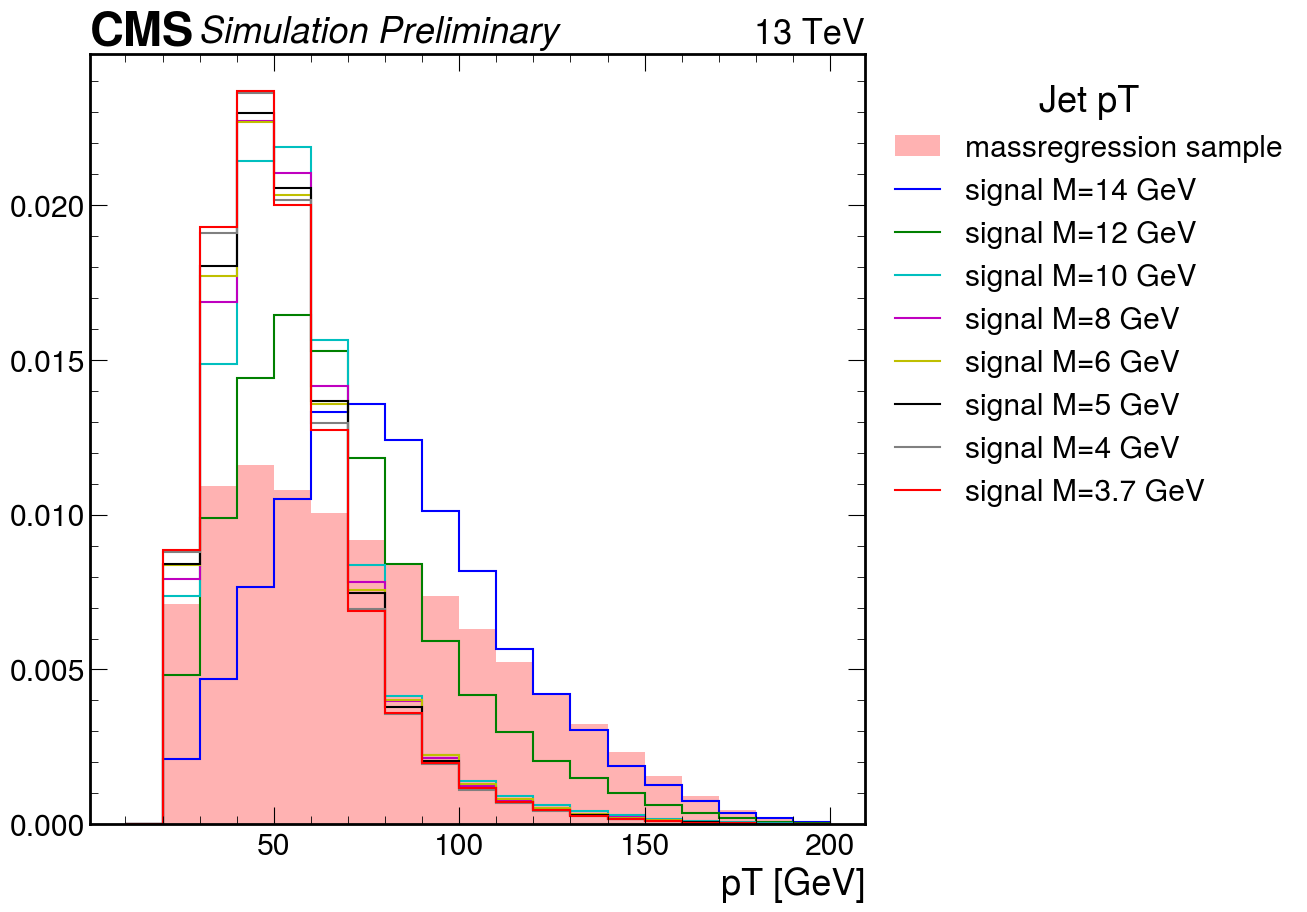

In [5]:
fig, ax = plt.subplots()
out["train_mass"]["jet_pt"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["jet_pt"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["jet_pt"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["jet_pt"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["jet_pt"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["jet_pt"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["jet_pt"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["jet_pt"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["jet_pt"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="Jet pT", loc='best',bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

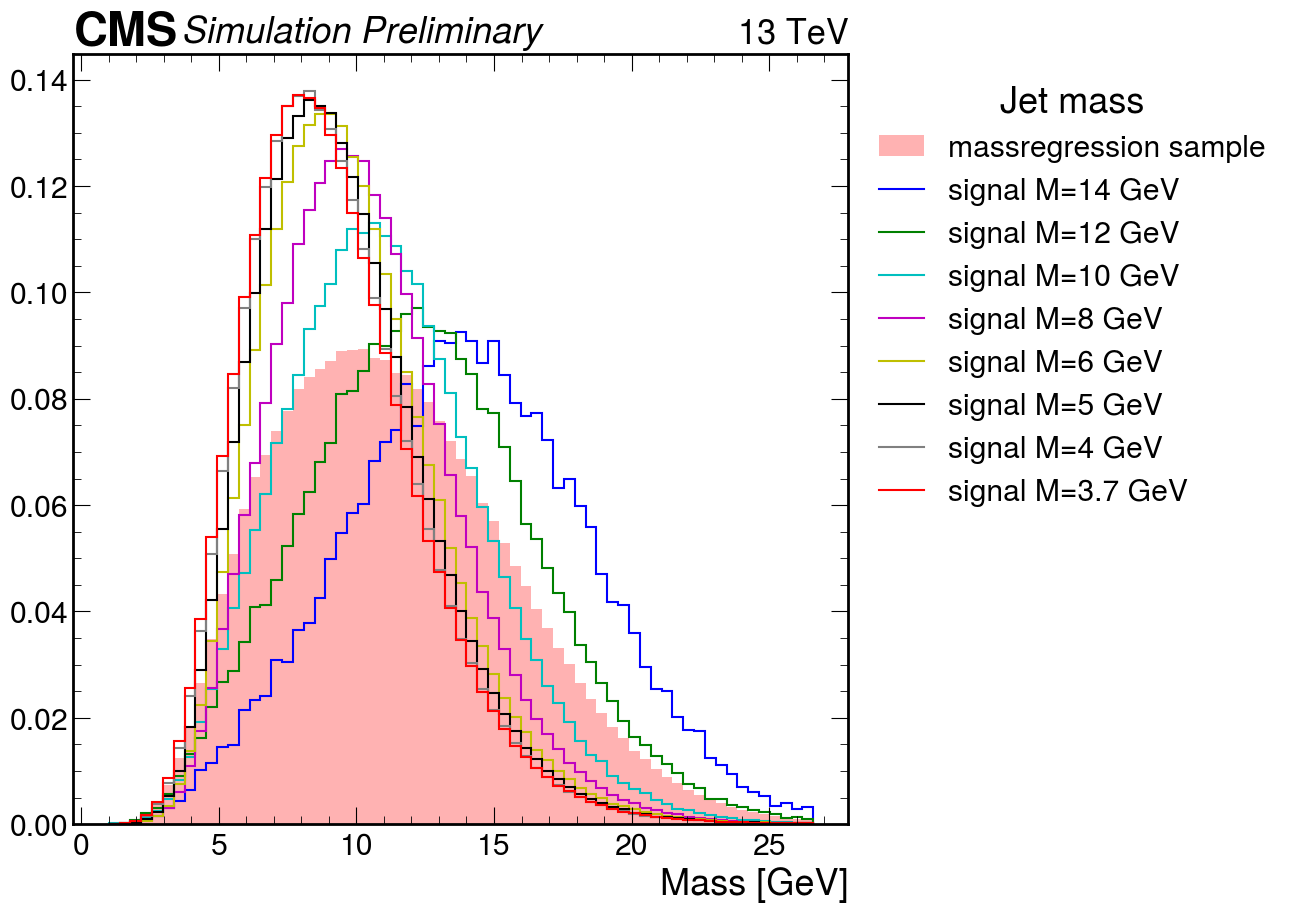

In [6]:
fig, ax = plt.subplots()
out["train_mass"]["jet_mass"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["jet_mass"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["jet_mass"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["jet_mass"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["jet_mass"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["jet_mass"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["jet_mass"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["jet_mass"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["jet_mass"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="Jet mass",loc='best', bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

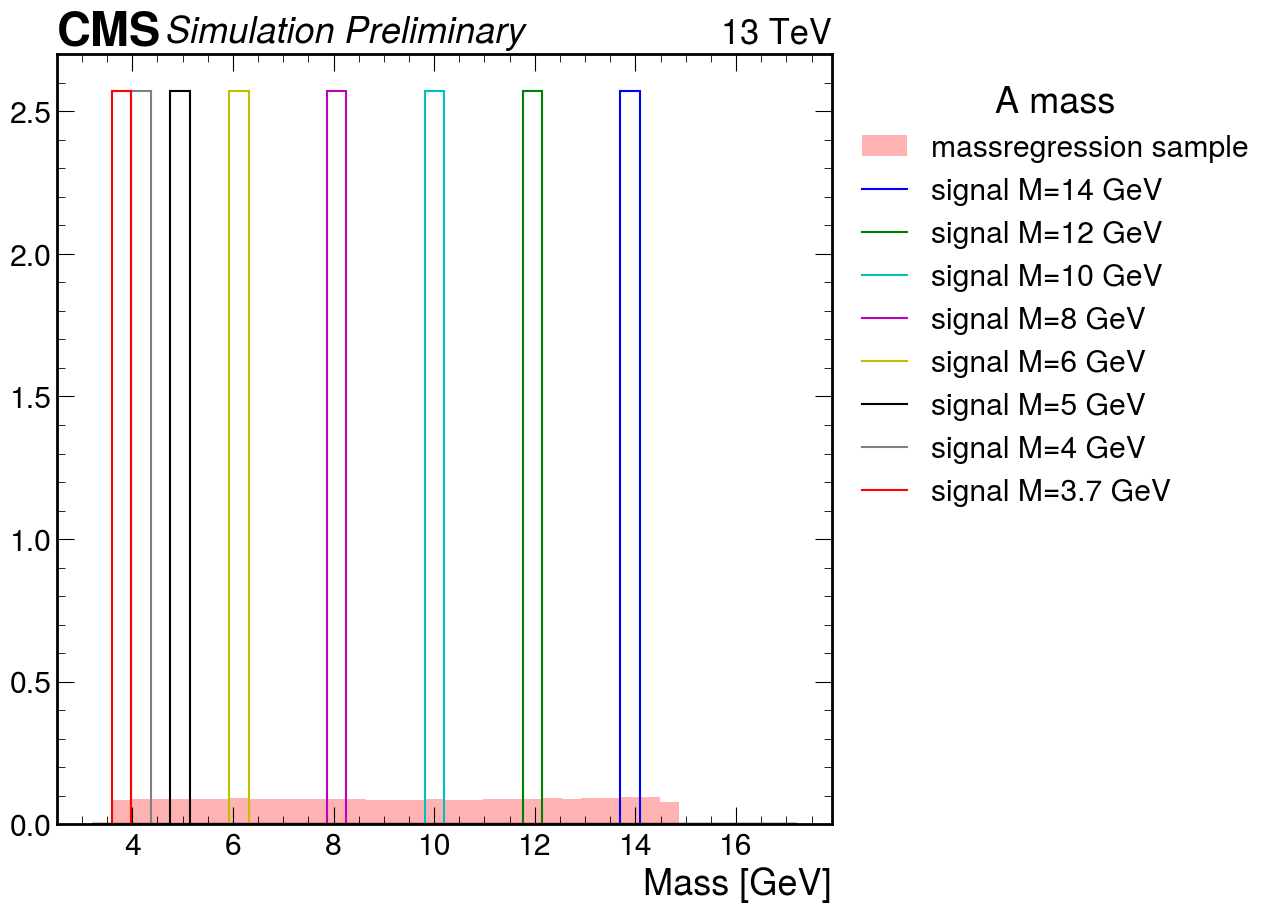

In [7]:
fig, ax = plt.subplots()
out["train_mass"]["a_mass"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["a_mass"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["a_mass"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["a_mass"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["a_mass"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["a_mass"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["a_mass"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["a_mass"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["a_mass"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="A mass",loc='best',bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

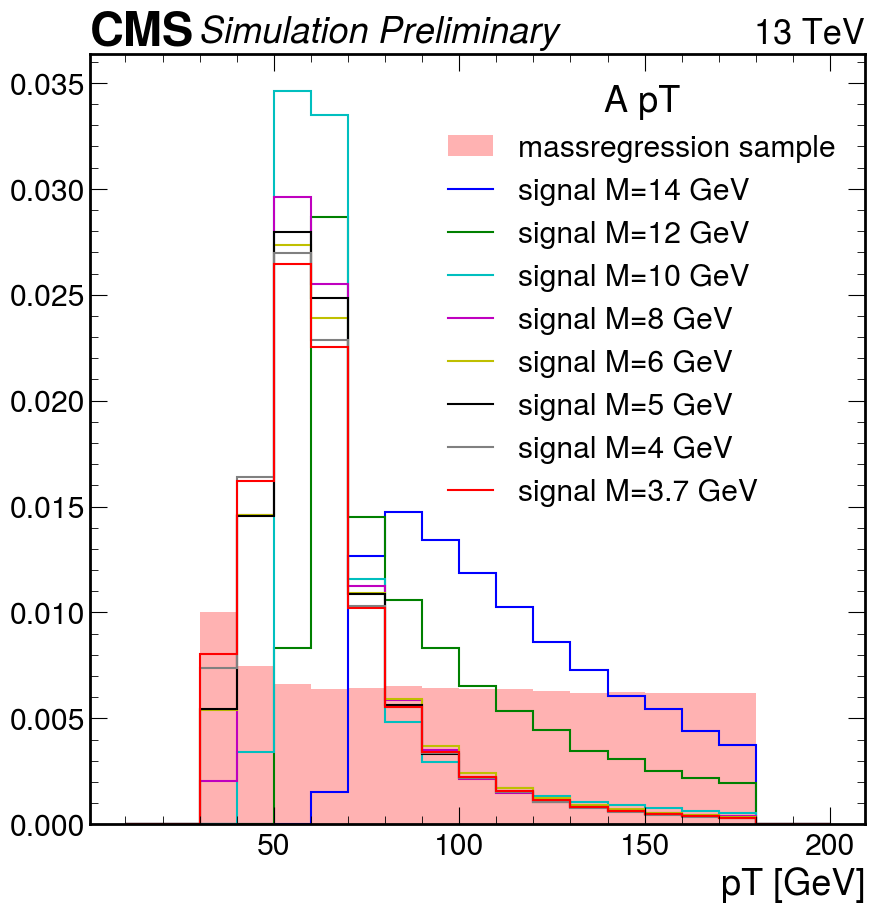

In [8]:
fig, ax = plt.subplots()
out["train_mass"]["a_pt"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["a_pt"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["a_pt"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["a_pt"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["a_pt"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["a_pt"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["a_pt"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["a_pt"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["a_pt"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="A pT",loc='best',bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

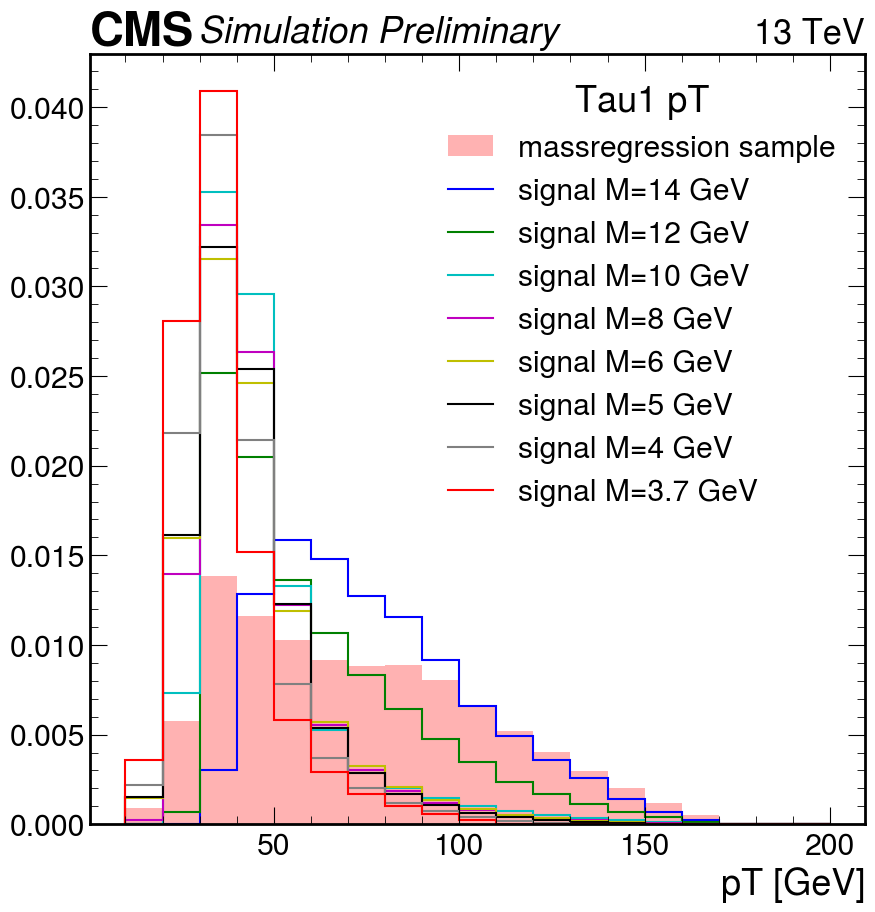

In [9]:
fig, ax = plt.subplots()
out["train_mass"]["tau1_pt"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["tau1_pt"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["tau1_pt"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["tau1_pt"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["tau1_pt"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["tau1_pt"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["tau1_pt"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["tau1_pt"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["tau1_pt"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="Tau1 pT",loc='best', bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

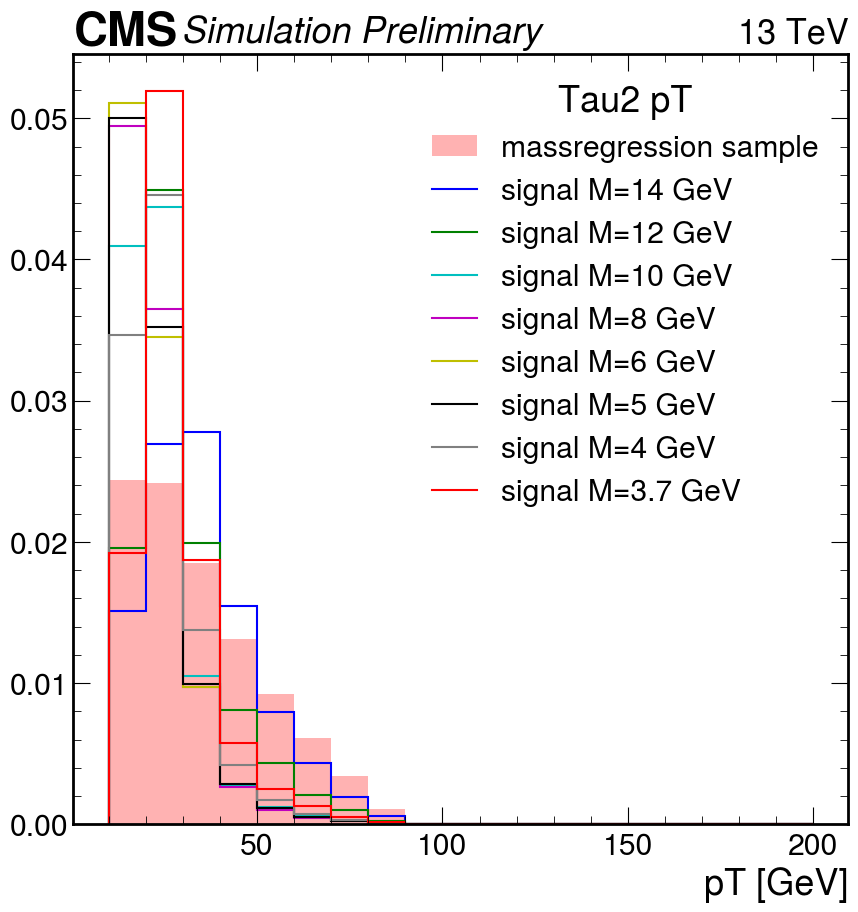

In [10]:
fig, ax = plt.subplots()
out["train_mass"]["tau2_pt"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["tau2_pt"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["tau2_pt"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["tau2_pt"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["tau2_pt"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["tau2_pt"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["tau2_pt"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["tau2_pt"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["tau2_pt"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="Tau2 pT",loc='best', bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

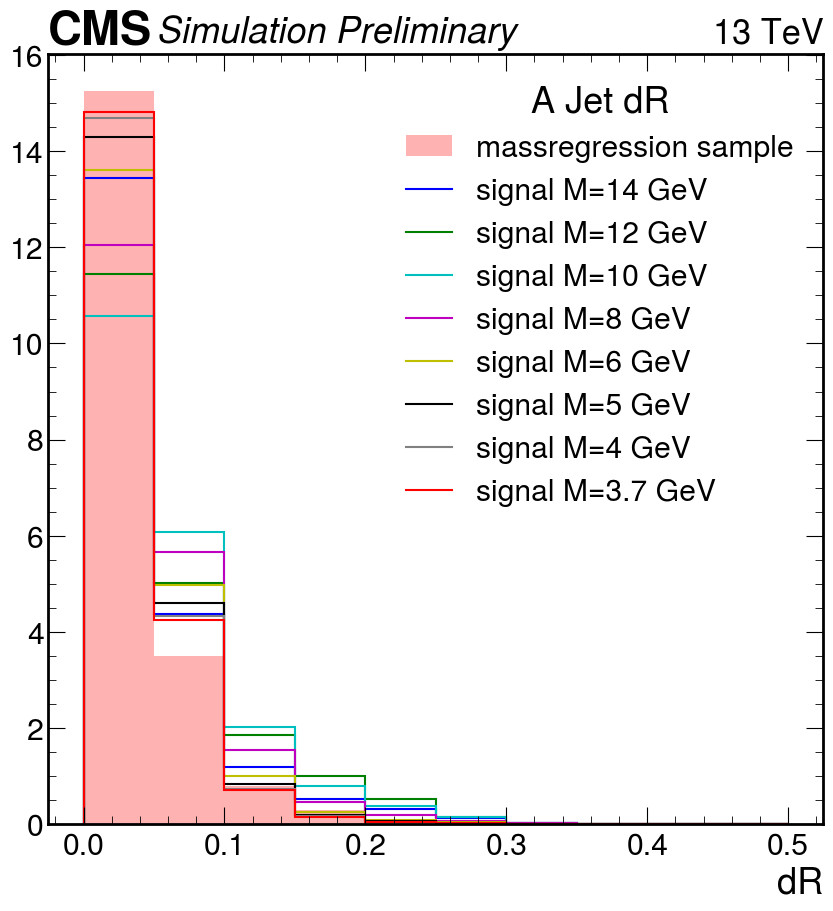

In [11]:
fig, ax = plt.subplots()
out["train_mass"]["a_jet_dr"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["a_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["a_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["a_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["a_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["a_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["a_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["a_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["a_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="A Jet dR",loc='best',bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

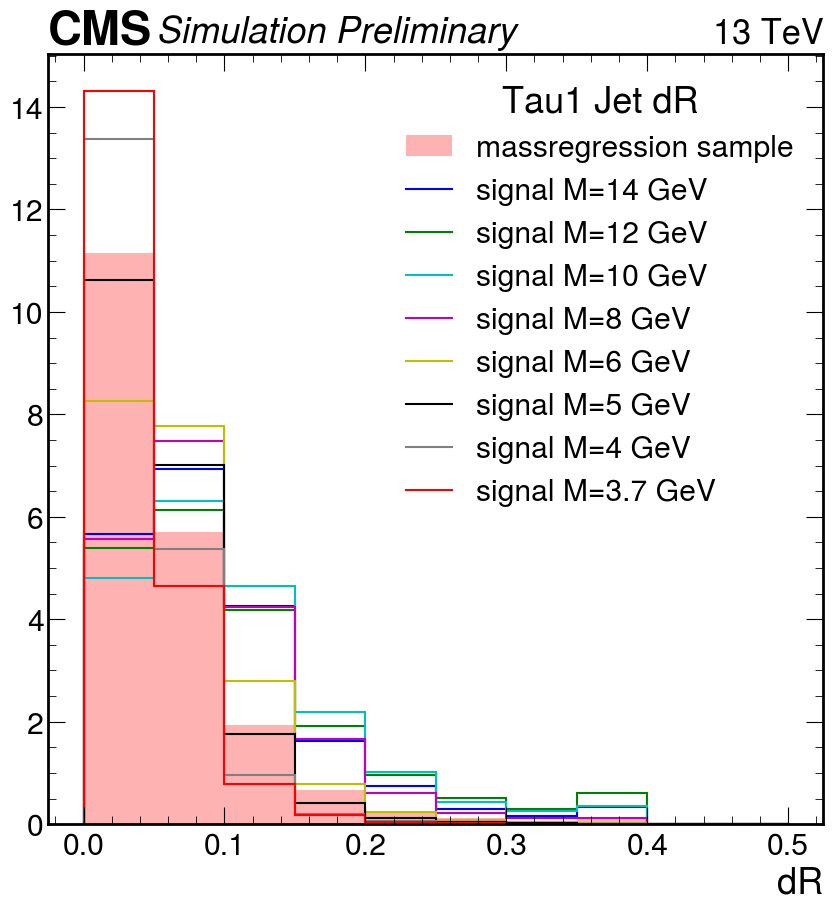

In [12]:
fig, ax = plt.subplots()
out["train_mass"]["tau1_jet_dr"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["tau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["tau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["tau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["tau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["tau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["tau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["tau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["tau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="Tau1 Jet dR",loc='best',bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

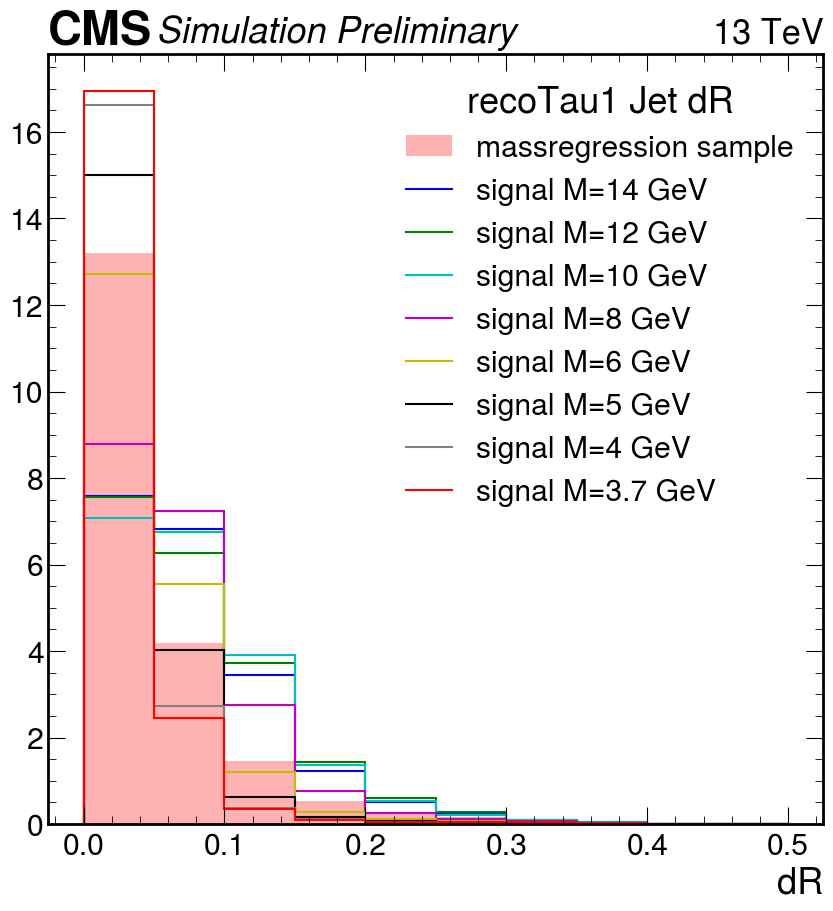

In [13]:
fig, ax = plt.subplots()
out["train_mass"]["recotau1_jet_dr"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["recotau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["recotau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["recotau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["recotau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["recotau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["recotau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["recotau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["recotau1_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="recoTau1 Jet dR",loc='best',bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

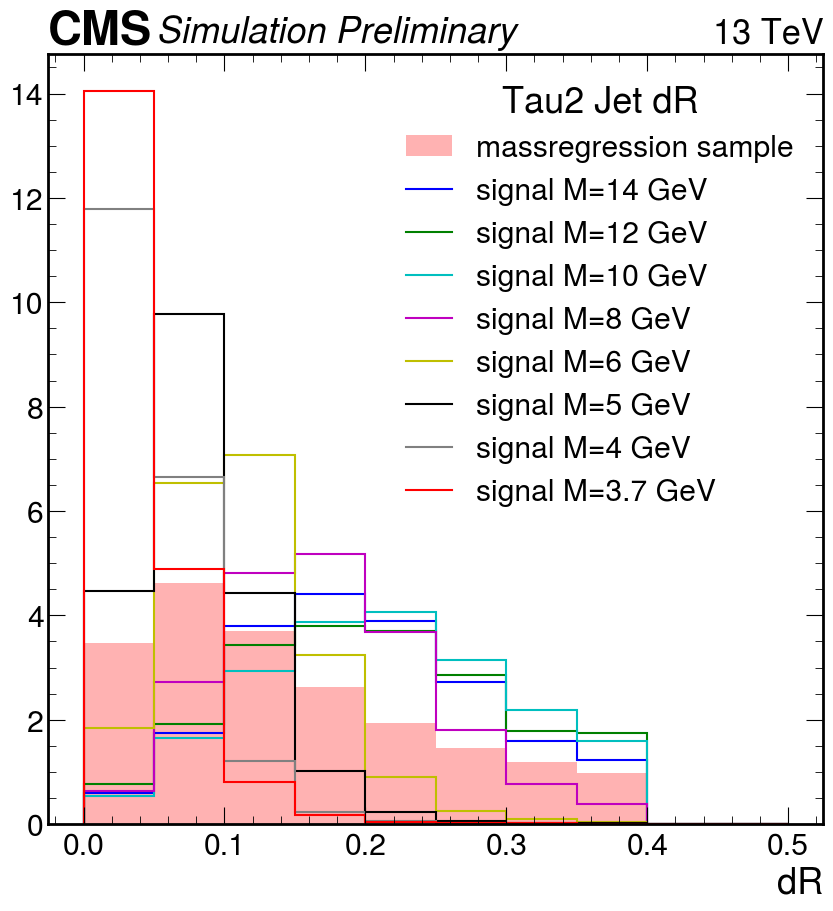

In [14]:
fig, ax = plt.subplots()
out["train_mass"]["tau2_jet_dr"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["tau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["tau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["tau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["tau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["tau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["tau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["tau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["tau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="Tau2 Jet dR",loc='best',bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

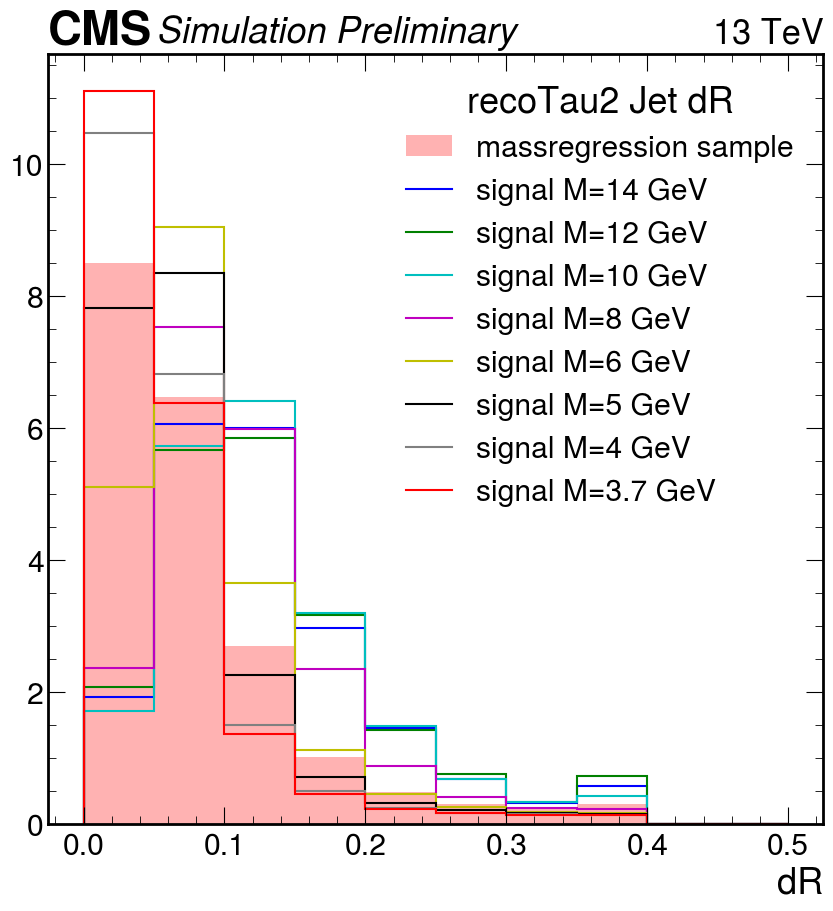

In [15]:
fig, ax = plt.subplots()
out["train_mass"]["recotau2_jet_dr"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["recotau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["recotau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["recotau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["recotau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["recotau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["recotau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["recotau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["recotau2_jet_dr"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="recoTau2 Jet dR",loc='best',bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

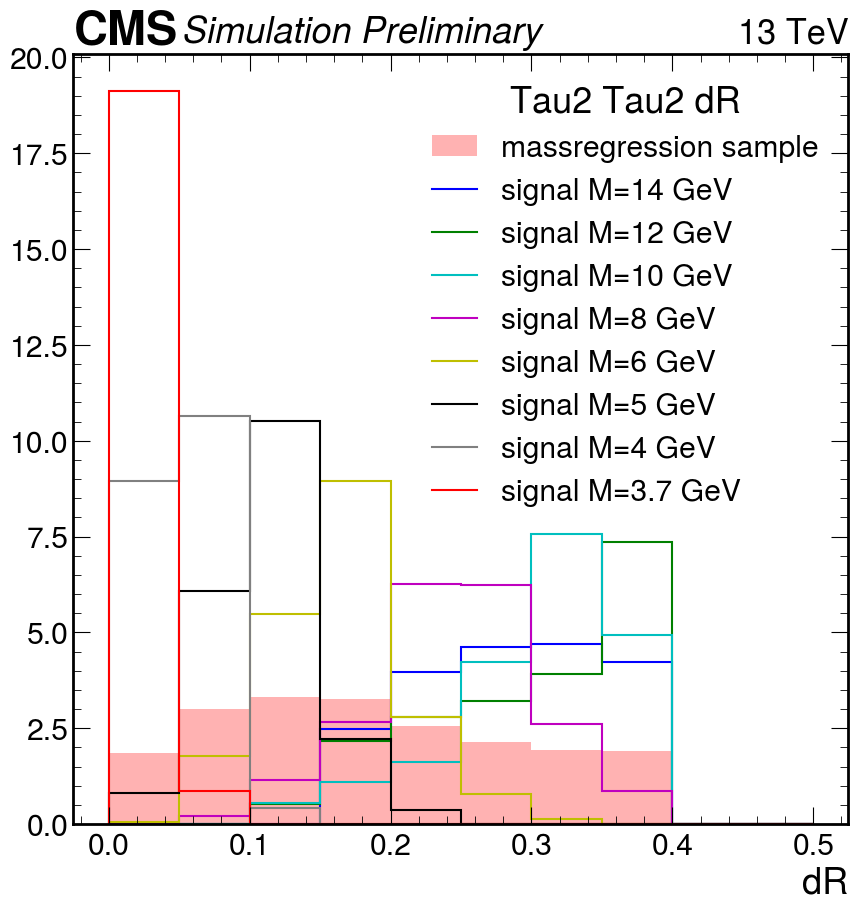

In [16]:
fig, ax = plt.subplots()
out["train_mass"]["taus_dr"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["taus_dr"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["taus_dr"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["taus_dr"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["taus_dr"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["taus_dr"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["taus_dr"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["taus_dr"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["taus_dr"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="Tau2 Tau2 dR",loc='best',bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

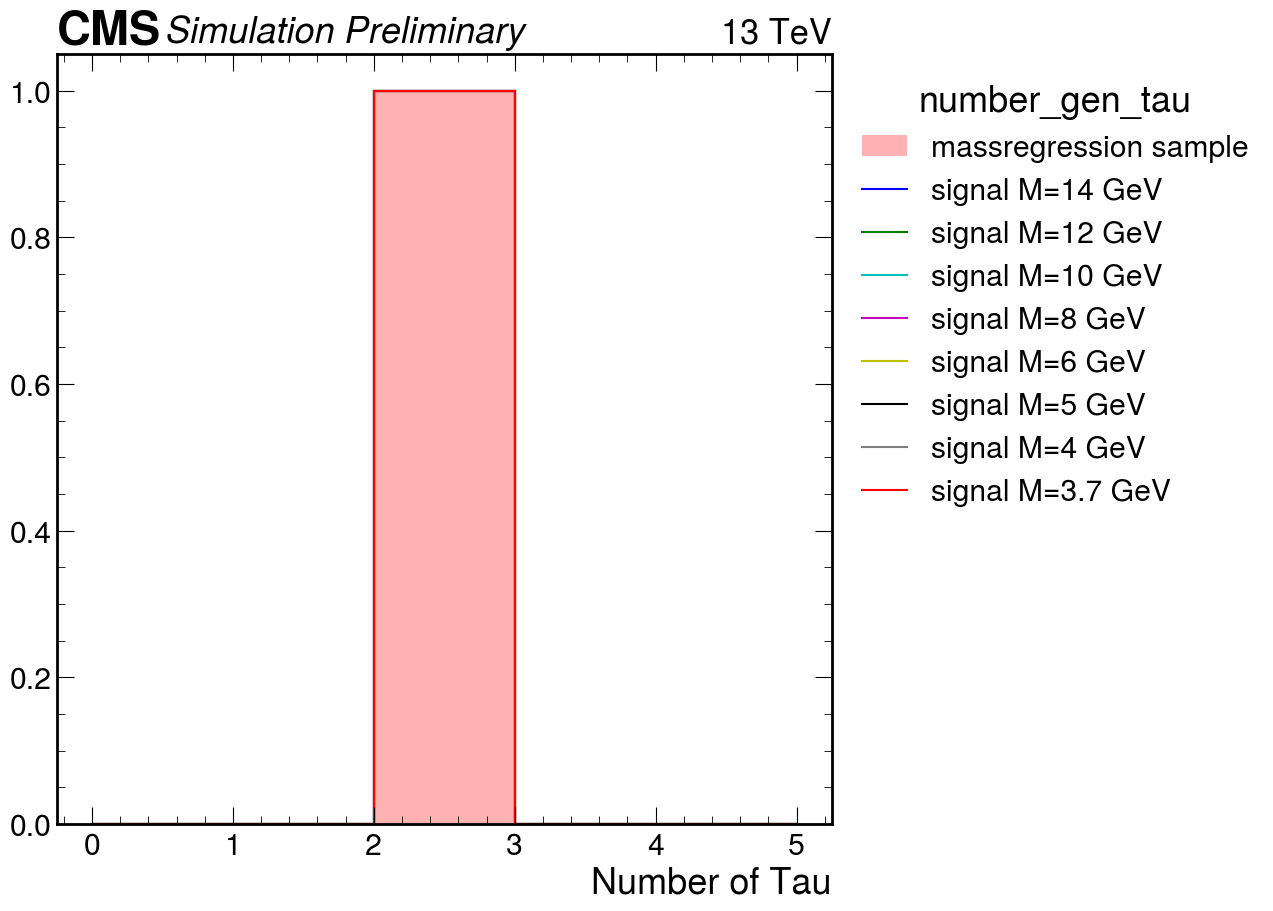

In [17]:
fig, ax = plt.subplots()
out["train_mass"]["number_gen_tau"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["number_gen_tau"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["number_gen_tau"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["number_gen_tau"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["number_gen_tau"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["number_gen_tau"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["number_gen_tau"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["number_gen_tau"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["number_gen_tau"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="number_gen_tau",loc='best',bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

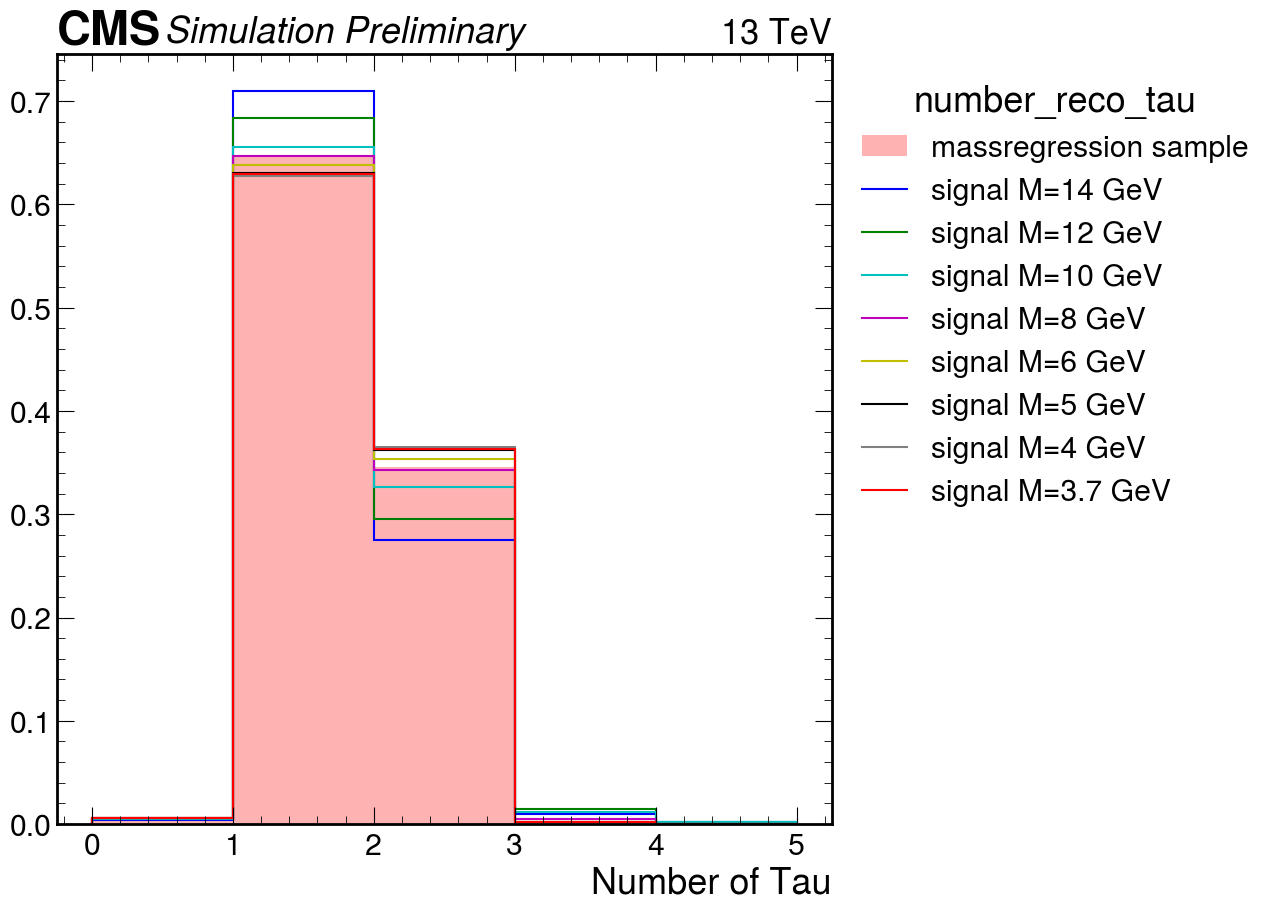

In [18]:
fig, ax = plt.subplots()
out["train_mass"]["number_reco_tau"].plot1d(ax=ax,histtype='fill',density=True,color="red",alpha=0.3,label='massregression sample')
out["signal_m14"]["number_reco_tau"].plot1d(ax=ax,histtype='step',density=True,color="b", label='signal M=14 GeV')
out["signal_m12"]["number_reco_tau"].plot1d(ax=ax,histtype='step',density=True,color="g", label='signal M=12 GeV')
out["signal_m10"]["number_reco_tau"].plot1d(ax=ax,histtype='step',density=True,color="c", label='signal M=10 GeV')
out["signal_m8"]["number_reco_tau"].plot1d(ax=ax,histtype='step',density=True,color="m", label='signal M=8 GeV')
out["signal_m6"]["number_reco_tau"].plot1d(ax=ax,histtype='step',density=True,color="y", label='signal M=6 GeV')
out["signal_m5"]["number_reco_tau"].plot1d(ax=ax,histtype='step',density=True,color="k", label='signal M=5 GeV')
out["signal_m4"]["number_reco_tau"].plot1d(ax=ax,histtype='step',density=True,color="grey", label='signal M=4 GeV')
out["signal_m3p7"]["number_reco_tau"].plot1d(ax=ax,histtype='step',density=True,color="red", label='signal M=3.7 GeV')
# ax.set_yscale("log")
ax.legend(title="number_reco_tau",loc='best',bbox_to_anchor=(1, 1))
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

In [19]:
##### 